### Common Weight 

#### Basic Vector Operations

In [21]:
%run common.ipynb

In [24]:
# %load vector.py
import math


def neg(v):
    return tuple(-x for x in v)


def norm(v):
    return math.sqrt(dotprod(v, v))


def normed(v):
    n = norm(v)
    return tuple(x / n for x in v)


def add(u, v):
    return tuple(x + y for x, y in zip(u, v))


def dotprod(u, v):
    return sum(x * y for x, y in zip(u, v))


def angle(u, v):
    return math.acos(dotprod(u, v) / (norm(u) * norm(v)))


#### Calclulating a common weight vector

In [25]:
# %load weight.py
from vector import add, dotprod


def weight(u, v):
    w = add(u, v)
    while True:
        if dotprod(w, u) <= 0:
            w = add(w, u)
        elif dotprod(w, v) <= 0:
            w = add(w, v)
        else:
            return w


In [26]:
def run_weight(u, v):
    print(f"u = {u}	v = {v}	∡ uv = {_deg(u, v)}°")
    print("")
    i, w = 0, add(u, v)
    while True:
        a, b = dotprod(w, u), dotprod(w, v)
        print(f"w{i} = {w}	∡ wu = {_deg(w, u)}°	∡ wv = {_deg(w, v)}°")
        if a < 0:
            w = add(w, u)
        elif b < 0:
            w = add(w, v)
        else:
            break
        i = i + 1
    print("")
    print(f"w = {normed(w)}")


In [27]:
u, v = (4, -6), (-10, 5)
run_weight(u, v)

u = (4, -6)	v = (-10, 5)	∡ uv = 150.26°

w0 = (-6, -1)	∡ wu = 114.23°	∡ wv = 36.03°
w1 = (-2, -7)	∡ wu = 49.64°	∡ wv = 100.62°
w2 = (-12, -2)	∡ wu = 114.23°	∡ wv = 36.03°
w3 = (-8, -8)	∡ wu = 78.69°	∡ wv = 71.57°

w = (-0.7071067811865475, -0.7071067811865475)


In [28]:
u, v = (4, -7), (-3, 5)  # requires 80 iterations
u, v = (-1, -10), (4, 8)
run_weight(u, v)

u = (-1, -10)	v = (4, 8)	∡ uv = 159.15°

w0 = (3, -2)	∡ wu = 62.02°	∡ wv = 97.13°
w1 = (7, 6)	∡ wu = 136.31°	∡ wv = 22.83°
w2 = (6, -4)	∡ wu = 62.02°	∡ wv = 97.13°
w3 = (10, 4)	∡ wu = 117.51°	∡ wv = 41.63°
w4 = (9, -6)	∡ wu = 62.02°	∡ wv = 97.13°
w5 = (13, 2)	∡ wu = 104.46°	∡ wv = 54.69°
w6 = (12, -8)	∡ wu = 62.02°	∡ wv = 97.13°
w7 = (16, 0)	∡ wu = 95.71°	∡ wv = 63.43°
w8 = (15, -10)	∡ wu = 62.02°	∡ wv = 97.13°
w9 = (19, -2)	∡ wu = 89.7°	∡ wv = 69.44°

w = (0.9945054529214061, -0.10468478451804275)


In [35]:
import random

n = 10
u, v = (random.randint(-n, n), random.randint(-n, n)), (random.randint(-n, n), random.randint(-n, n))
run_weight(u, v)

u = (4, -3)	v = (-2, -6)	∡ uv = 71.57°

w0 = (2, -9)	∡ wu = 40.6°	∡ wv = 30.96°

w = (0.21693045781865616, -0.9761870601839528)


#### Maximimum Number of Iterations

Find vectors with largest number of iterations in a given range. The more similar the vector length and the closer the angle to 180° the more iterations.


In [30]:
import itertools


def count_weight_iterations(u, v):
    n, w = 0, add(u, v)
    while True:
        a, b = dotprod(w, u), dotprod(w, v)
        if a < 0:
            w = add(w, u)
        elif b < 0:
            w = add(w, v)
        else:
            return n
        n = n + 1


for n in range(3, 10):
    N = range(-n + 1, n)
    M = list(itertools.product(N, N))
    R = list(itertools.product(M, M))
    k, u, v = max([(count_weight_iterations(u, v), u, v) for u, v in R])
    print(f"n = {n} ({len(R)} combinations):	max iterations = {k}	u = {u}	v = {v}	∡ uv = {_deg(u, v)}°")


n = 3 (625 combinations):	max iterations = 5	u = (2, 2)	v = (-1, -2)	∡ uv = 161.57°
n = 4 (2401 combinations):	max iterations = 11	u = (3, 2)	v = (-2, -1)	∡ uv = 172.87°
n = 5 (6561 combinations):	max iterations = 29	u = (4, 3)	v = (-3, -2)	∡ uv = 176.82°
n = 6 (14641 combinations):	max iterations = 55	u = (5, 4)	v = (-4, -3)	∡ uv = 178.21°
n = 7 (28561 combinations):	max iterations = 89	u = (6, 5)	v = (-5, -4)	∡ uv = 178.85°
n = 8 (50625 combinations):	max iterations = 131	u = (7, 6)	v = (-6, -5)	∡ uv = 179.2°
n = 9 (83521 combinations):	max iterations = 181	u = (8, 7)	v = (-7, -6)	∡ uv = 179.42°


#### Plotting Weight Iterations

In [31]:
import matplotlib.pyplot as plot


def plot_weight_iterations(u, v, size=(7, 7), t=2.75):
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = plot.axes()
    ax.set_aspect('equal')
    ax.arrow(0.0, 0.0, u[0], u[1], head_width=0.1, head_length=0.3, fc='lightblue', ec='black')
    ax.arrow(0.0, 0.0, v[0], v[1], head_width=0.1, head_length=0.3, fc='lightblue', ec='black')
    ax.annotate('u', xy=u, xytext=(u[0] + 0.1, u[1] - 0.1))
    ax.annotate('v', xy=v, xytext=(v[0] + 0.1, v[1] - 0.1))
    n, w = 1, add(u, v)
    while True:
        ax.arrow(0.0, 0.0, w[0], w[1], head_width=0.05, head_length=0.2)
        ax.annotate(n, xy=w, xytext=(w[0] + 0.05, w[1] + 0.05))
        a, b = dotprod(w, u), dotprod(w, v)
        if a < 0:
            w = add(w, u)
        elif b < 0:
            w = add(w, v)
        else:
            break
        n = n + 1
    ax.arrow(0.0, 0.0, w[0], w[1], width=0.01, head_width=0.1, head_length=0.3, fc='red', ec='red')
    #     ax.annotate('w', xy=w, xytext=(w[0] + 0.05, w[1] + 0.05))
    plot.grid()
    plot.xlim(-t, t)
    plot.ylim(-t, t)
    plot.title(f"Weight vector calulated after {n} Iterations")
    plot.show()
    

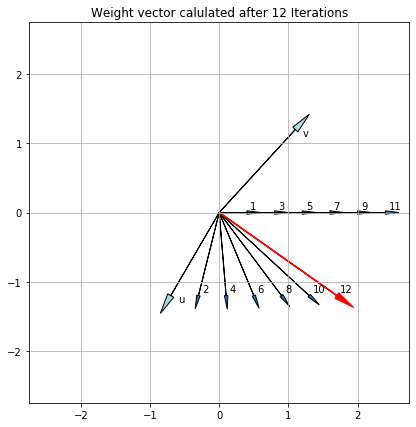

In [32]:
u, v = (-0.5, -1.2), (1.1, 1.2)
u, v = (4/5, -7/5), (-3/5, 5/5)
u, v = (-1/8, -10/8), (4/8, 8/8)
u, v = (-0.7, -1.2), (1.1, 1.2)
plot_weight_iterations(u, v)
